# PROJECT : PHARAMCEUTICAL STORE FUTURE SALES FORECASTING USING MACHINE LEARNING

### INTRODUCTION : The project aims to analyse the trends in pharmaceutical store sales data across 1115 stores based on different parameters and create different machine learning and deep learning models to forecast future sales of the stores based on the historical data. The project is divided into two parts, the first parts contains Data cleaning and Exploratory data analysis and the second part contains different machine learning and deep learning models for sales forecasting. 

ATTRIBUTES OF THE DATASET : 

1) Store data - The store data contains following attributes. 
   * Store - Represents unique id of each store. 
   * StoreType - Represents 4 different type of stores (a,b,c,d) 
   * Assortment - Describes 3 different type of asortment level (a,b,c). 
   * CompetitionDistance - Distance in meters to the neares competitor store. 
   * CompetitionOpenSince [Month/Year] - gives the approximate year or month of the time the nearest competitior store was opened. 
   * Promo2 - indicates whether a store is running a promotional offer on that day. (0 represents no promo and 1 represents active promo)
   * Promo2Since[Year/Week] - describes the year and week when the store started participating in promo. 
   * Promo2Interval - describes the month of an year when promotional offers were active. 

2) Train data :
   * Store - represents unique id of each store. 
   * DayOfWeek - represents specific day of each week of sale. 
   * Date - represents date of sales. 
   * Customers - total number of customers visited the store on that particular day. 
   * Sales - Represents total sales from a store on a particular day. 
   * Open - Indicates whether store was open or closed on that day (0 represents that store was closed and 1 represents open stores). 
   * Promo - Indicates whether store is running a promotional offer on that day. 
   * StateHoliday - indicates a state holiday. (a = public holiday, b = Easter holiday, c = Christmas, 0 = No holiday). 
   * SchoolHoliday - indicates if there is school holiday on that day. 
   

3) Test data - The test data contains future dates and same attributes as that of train data except the sales. We will develop machine learning models to predict the sales for future dates (6 weeks ahead).
   

# PART 1 : DATA CLEANING AND EXPLORATORY DATA ANALYSIS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


## Importing the data

In [3]:
# importing the store data
store_df = pd.read_csv("data/store.csv")
store_df.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
# importing the training data
train_df = pd.read_csv("data/train.csv")
train_df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
# Shape of the store and training data
print('Number of rows and columns in store_df is :',store_df.shape)
print('Number of rows and columns in train_df is ',train_df.shape)

Number of rows and columns in store_df is : (1115, 10)
Number of rows and columns in train_df is  (1017209, 9)


In [6]:
# Information about train_df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [7]:
# Information about store_df
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


### The store data includes useful data that can aid the training process so we merge it with Train data on the same column named "Store".

In [8]:
# Merge the store data to train dataset
data = train_df.merge(store_df,on=["Store"], how="inner")
print(data.shape)

(1017209, 18)


## Identifying the percentage of null values in each column.

In [9]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * mis_val / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending and remove columns with no missing values
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,0] != 0].sort_values(
    '% of Total Values', ascending=False).round(2)

    if mis_val_table_ren_columns.shape[0] == 0:
        return

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [10]:
mis_values_df = missing_values_table(data)
mis_values_df

,Missing Values,% of Total Values,Dtype
Promo2SinceWeek,508031,49.94,float64
Promo2SinceYear,508031,49.94,float64
PromoInterval,508031,49.94,object
CompetitionOpenSinceMonth,323348,31.79,float64
CompetitionOpenSinceYear,323348,31.79,float64
CompetitionDistance,2642,0.26,float64


### Here, we will drop the columns having more than 30% missing values due to lack of sufficient data in these columns. Training a machine learning model on an insufficient data might produce biased and distorted results.

In [11]:
# Removing the columns having more than 30% missing values
data.drop(['Promo2SinceWeek','Promo2SinceYear','PromoInterval','CompetitionOpenSinceMonth','CompetitionOpenSinceYear'],axis=1,inplace=True)

In [13]:
# Impute missing values with 'mean' values in this important variable (CompetitionDistance)
data["CompetitionDistance"]=data["CompetitionDistance"].fillna(data["CompetitionDistance"].mean())

## Identifying columns having mixed datatype

In [14]:
# Function to calculate columns having mixed datatype
def show_cols_mixed_dtypes(df):
    mixed_dtypes = {'Column': [], 'Data type': []}
    for col in df.columns:
        dtype = pd.api.types.infer_dtype(df[col])
        if dtype.startswith("mixed"):
            mixed_dtypes['Column'].append(col)
            mixed_dtypes['Data type'].append(dtype)
    if len(mixed_dtypes['Column']) == 0:
        print('None of the columns contain mixed types.')
    else:
        print(pd.DataFrame(mixed_dtypes))

In [15]:
# calling the function
show_cols_mixed_dtypes(data)

         Column      Data type
0  StateHoliday  mixed-integer


In [16]:
# Here 0 is represented as an integer as well as a string. Since there are other string values we will convert the StateHoliday column into string.
data['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [17]:
# Function to convert the datatype into 'string'
def convert_to_string(df, columns):
    for col in columns:
        df[col] = df[col].astype("string")

In [19]:
# Converting all the columns with 'object' dtype into 'string' dtype for uniformity in the dtypes for further processing
convert_to_string(data, ['StateHoliday','StoreType','Assortment'])

In [20]:
# Converting datatype of 'Date' column from 'object' dtype to 'datetime'
data['Date'] = pd.to_datetime(data['Date'])

## Feature Engineering

In [21]:
# Creating new features to extract better insights from the data.
data['Year'] = data['Date'].apply(lambda x: x.year)
data['Month'] = data['Date'].apply(lambda x: x.month)
data['DayOfMonth'] = data['Date'].apply(lambda x: x.day)
data['weekday'] = data['DayOfWeek'].apply(lambda x: 0 if (x in [6, 7]) else 1)

# Univariate Analysis

## Value count of StoreType 

([<matplotlib.patches.Wedge at 0x1fc83c19420>,
 [Text(-0.14573022569430527, 1.0903039490523214, 'a'),
  Text(-0.36542502730682513, -1.0375280957245478, 'd'),
  Text(0.9543809932970793, -0.5469523924742268, 'c'),
  Text(1.098685640496396, -0.053757449409582186, 'b')],
 [Text(-0.0794892140150756, 0.5947112449376298, '54.2%\n551627'),
  Text(-0.19932274216735915, -0.5659244158497533, '30.8%\n312912'),
  Text(0.5205714508893159, -0.2983376686223055, '13.5%\n136840'),
  Text(0.5992830766343978, -0.02932224513249937, '1.6%\n15830')])

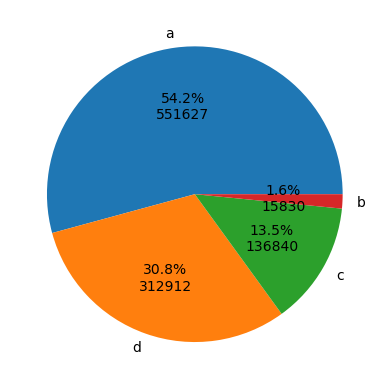

In [23]:
# Value count of 'StoreType' using pie chart
total = data['StoreType'].value_counts().values.sum()
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x,total*x/100)
plt.pie(data['StoreType'].value_counts().values,labels=data['StoreType'].value_counts().index,autopct=fmt)

### Observations
* Storetype 'a' has the highest values counts (54.2%), followed by storetype 'b' (30.8%)

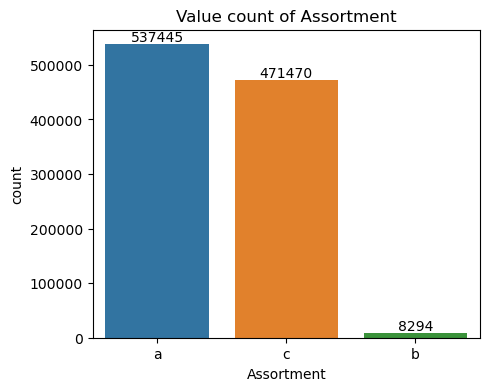

In [24]:
# Countplot of Assortment
plt.figure(figsize=(5,4))
ax = sns.countplot(x='Assortment',data=data)
plt.title('Value count of Assortment')
ax.bar_label(ax.containers[0])
plt.show(ax)

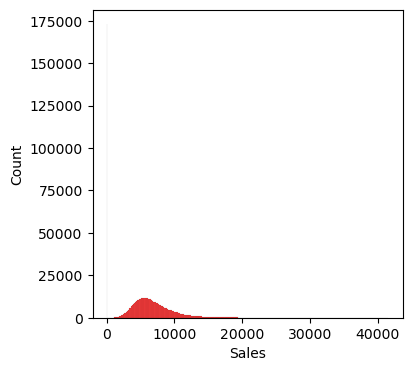

In [25]:
# Histogram showing distribution of 'Sales'
plt.figure(figsize=(4,4))
sns.histplot(data['Sales'],color='red')
plt.show()

### Observation
* Sales from majority of stores are confined within a range of 0 to 10,000

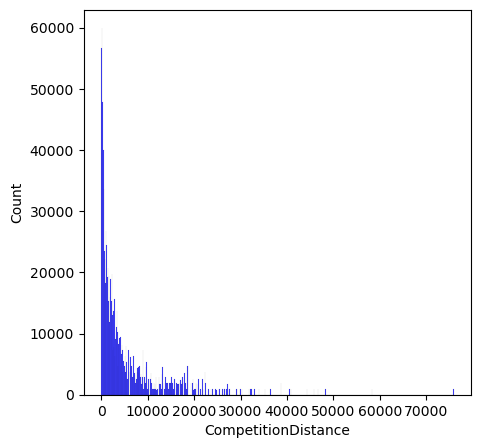

In [26]:
# Histogram of 'CompetitionDistance'
plt.figure(figsize=(5,5))
sns.histplot(data['CompetitionDistance'],color='blue')
plt.show()

### Observation
* Majority of competitor stores are located within a distance range of 0 to 5000 meters.

# Bivariate Analysis

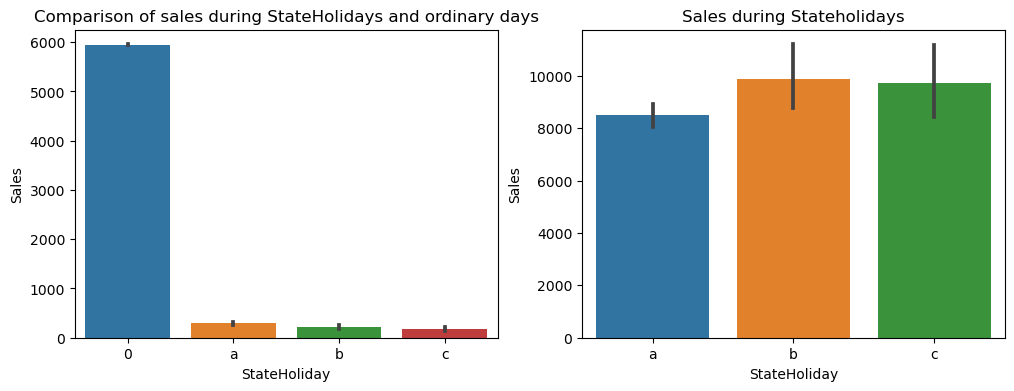

In [28]:
# Comparing Stateholidays and sales
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))

# Sales on holidays and no_holidays
sns.barplot(x='StateHoliday', y='Sales', data=data, ax=axis1).set_title('Comparison of sales during StateHolidays and ordinary days')

# Sales on holidays only
df = (data["StateHoliday"] != "0") & (data["Sales"] > 0)
sns.barplot(x='StateHoliday', y='Sales', data=data[df], ax=axis2).set_title('Sales during Stateholidays')
plt.show()

### Observation
* Sales during ordinary days (represented by '0') are extremely higher as compared to sales on Stateholidays. This might be due to the reason that majority of stores are closed on StateHolidays.
* Almost equal sales are witnessed on StateHoliday type 'b' and 'c'.

# SchoolHoliday vs sales and Customers

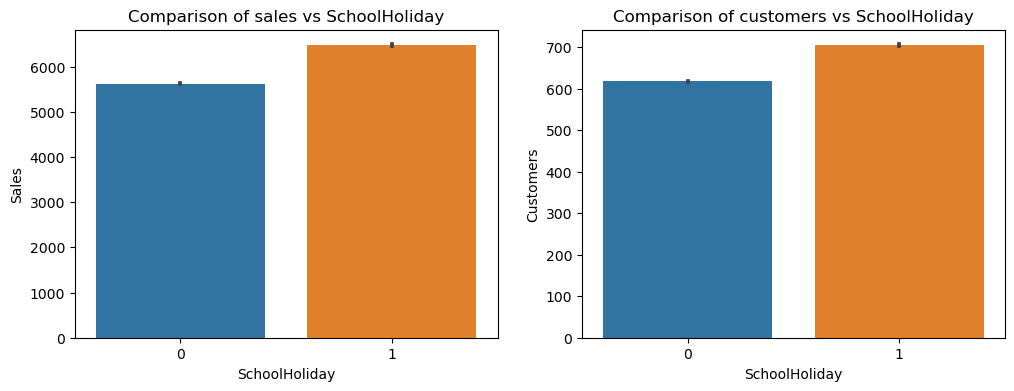

In [29]:
# Comparison of SchoolHoliday with Sales and Customers
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))

sns.barplot(x='SchoolHoliday', y='Sales', data=data, ax=axis1).set_title('Comparison of sales vs SchoolHoliday')
sns.barplot(x='SchoolHoliday', y='Customers', data=data, ax=axis2).set_title('Comparison of customers vs SchoolHoliday')
plt.show()

### Observation
* Though Sales and number of customers visitng the stores are slightly higher on SchoolHoliday (represented by 1), there is not much sharp difference between sales and customers on SchoolHolidays and non holidays. It indicates that SchoolHoliday does not affect the number of customers and sales significantly.

# StoreType vs Sales and Customers

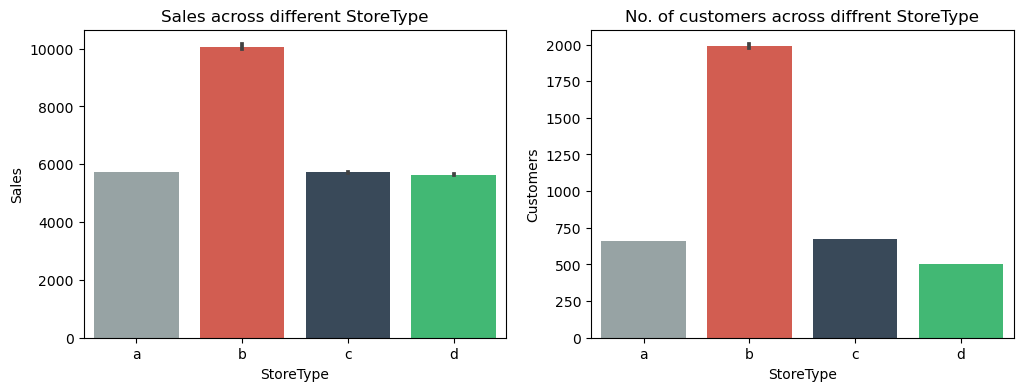

In [31]:
# Comparison of Sales and number of customers across different StoreTypes
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))
sns.barplot(x='StoreType', y='Sales', data=data, ax=axis1, palette = ["#95a5a6", "#e74c3c", "#34495e", "#2ecc71"], order=['a','b','c', 'd']).set_title('Sales across different StoreType')
sns.barplot(x='StoreType', y='Customers', data=data, ax=axis2, palette = ["#95a5a6", "#e74c3c", "#34495e", "#2ecc71"], order=['a','b','c', 'd']).set_title('No. of customers across diffrent StoreType')
plt.show()

### Observation
* StoreType 'b' witnessed the highest sales as well as the number of customers.
* StoreType 'a','c' and 'd' witnessed nearly equal sales.
* Nearly equal number of customers visited store 'a' and store 'c' whereas lowest number of customers visits store 'd'.
* Though store 'd' has the lowest number of customers, yet its sales are proportionately equal to store 'a' and 'c' which indicates that store 'd' sell high value pharmaceutical products.

# Assortment vs Sales and Customers

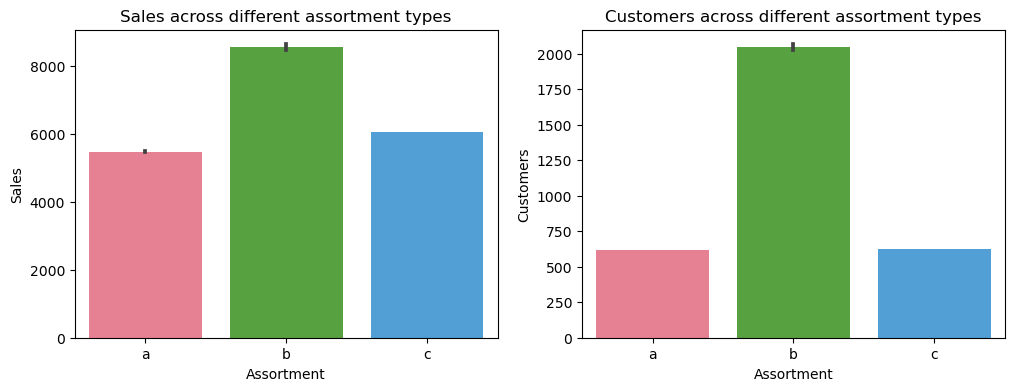

In [32]:
# Comparison of Sales and number of customers across different assortment types.
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))

sns.barplot(x='Assortment', y='Sales', data=data, palette = 'husl', order=['a','b','c'], ax=axis1).set_title('Sales across different assortment types')
sns.barplot(x='Assortment', y='Customers', data=data, palette = 'husl', order=['a','b','c'], ax=axis2).set_title('Customers across different assortment types')
plt.show()

### Observation
* Stores of assortment type 'b' registered highest sales as well as number of customers,
* Assortment 'c' witness slightly higher sales and number of customers than assortment type 'b' (but the difference is not sharp)
* Assortment 'a' and 'c' sell high value products as even though the number of customers visiting them are low but there sales are propotionately on higher side.

# DayOfWeek vs Sales and Customers

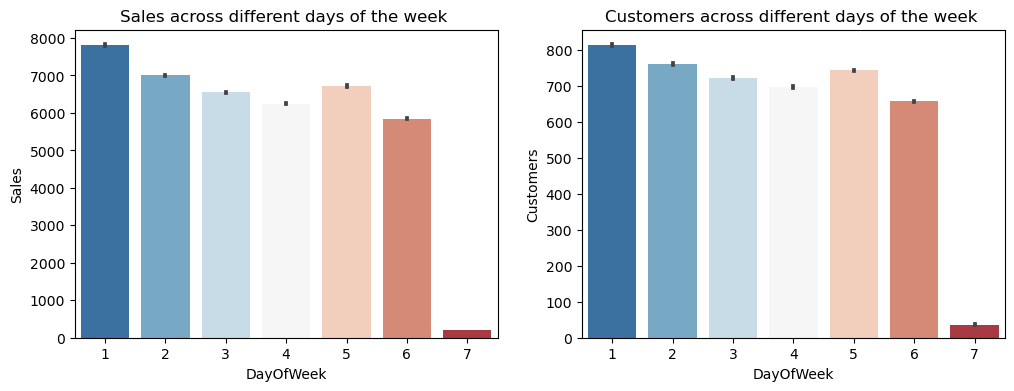

In [33]:
# Comparison of Sales and number of customers across DayOfWeek
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))
sns.barplot(x='DayOfWeek', y='Sales', data=data, palette = 'RdBu_r', ax=axis1).set_title('Sales across different days of the week ')
sns.barplot(x='DayOfWeek', y='Customers', data=data, palette = 'RdBu_r', ax=axis2).set_title('Customers across different days of the week ')
plt.show()

### Observation
* Both sales as well as number of customers visitng the stores are higher on weekdays as compared to weekends (Friday,Saturday and Sunday represented by 5,6 and 7 respectively) and it also indicates that majority of stores are closed on Sunday (represented by 7).

# Impact of Promo on sales and customers

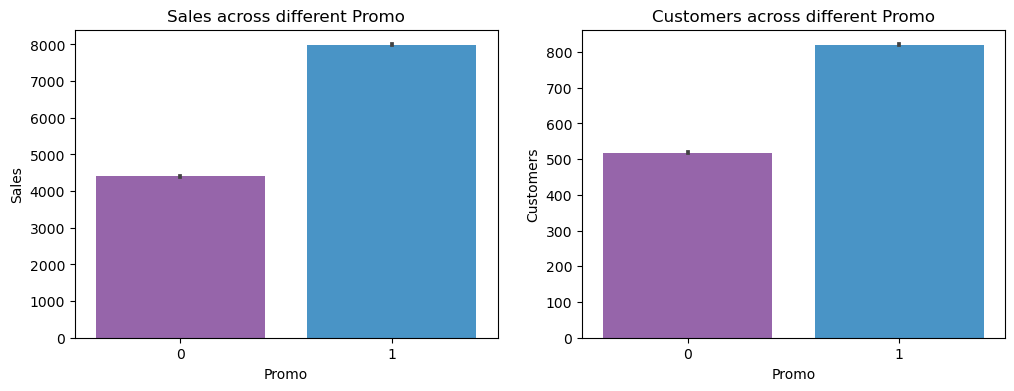

In [34]:
# Comparison of Promo with Sales and customers
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))

sns.barplot(x='Promo', y='Sales', data=data, palette = flatui, ax=axis1).set_title('Sales across different Promo')
sns.barplot(x='Promo', y='Customers', data=data, ax=axis2,  palette = flatui).set_title('Customers across different Promo')
plt.show()

### Observation
* Promos (represented by 1) attracts higher number of sales as well as customers as compared to stores without promo.

# Sales of each StoreType per month

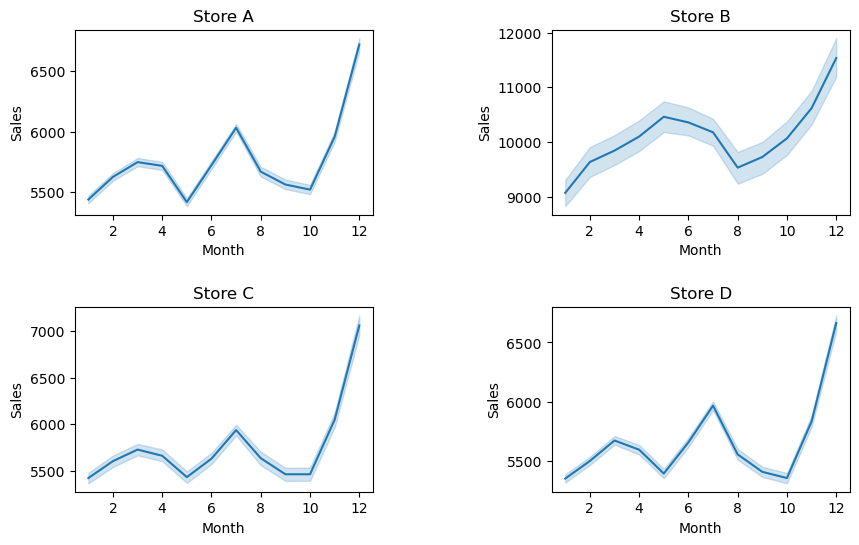

In [39]:
s1 = data[data['StoreType']=='a']
s2 = data[data['StoreType']=='b']
s3 = data[data['StoreType']=='c']
s4 = data[data['StoreType']=='d']


fig, axes = plt.subplots(2,2,figsize=(10,6))
fig.subplots_adjust(hspace=0.500,wspace=0.600)

sns.lineplot(data=s1,x='Month',y='Sales',markers='o',ax=axes[0,0]).set_title('Store A')
sns.lineplot(data=s2,x='Month',y='Sales',markers='o',ax=axes[0,1]).set_title('Store B')
sns.lineplot(data=s3,x='Month',y='Sales',markers='o',ax=axes[1,0]).set_title('Store C')
sns.lineplot(data=s4,x='Month',y='Sales',markers='o',ax=axes[1,1]).set_title('Store D')

plt.show()

### Observation
* StoreType 'b' registered highest sales across all the months.
* All the stores witnessed significant growth in sales in the last quarter of the year (October to December), which might be due to festive season (Christmas and New Year).
* Month from 6 to 8 (June to August) also indicates a sharp spikes in sales across all the stores which indicates higher sales of pharmaceutical products during rainy season due to various disease outbreaks in those seasons.

# Impact of Promos on monthly Sales Per StoreType

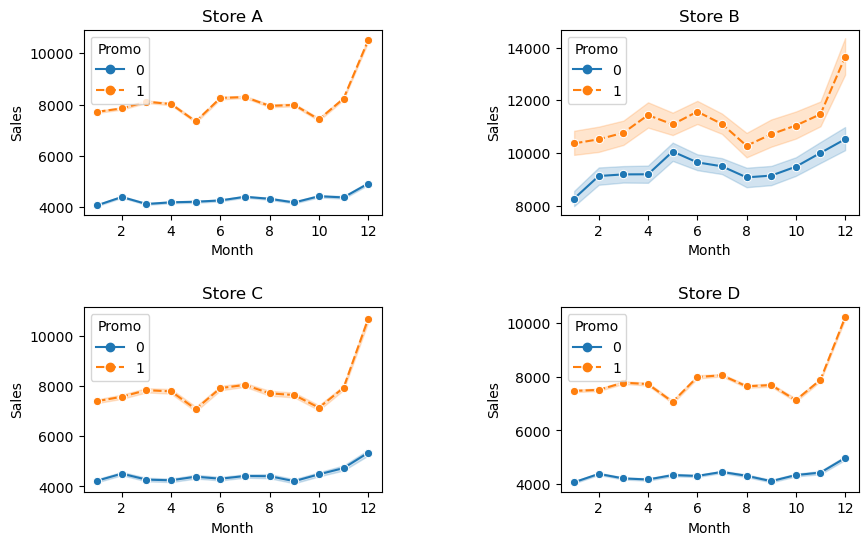

In [40]:
p1 = data[data['StoreType']=='a']
p2 = data[data['StoreType']=='b']
p3 = data[data['StoreType']=='c']
p4 = data[data['StoreType']=='d']


fig, axes = plt.subplots(2,2,figsize=(10,6))
fig.subplots_adjust(hspace=0.500,wspace=0.600)

sns.lineplot(data=p1,x='Month',y='Sales',hue='Promo',style='Promo',markers='o',ax=axes[0,0]).set_title('Store A')
sns.lineplot(data=p2,x='Month',y='Sales',hue='Promo',style='Promo',markers='o',ax=axes[0,1]).set_title('Store B')
sns.lineplot(data=p3,x='Month',y='Sales',hue='Promo',style='Promo',markers='o',ax=axes[1,0]).set_title('Store C')
sns.lineplot(data=p4,x='Month',y='Sales',hue='Promo',style='Promo',markers='o',ax=axes[1,1]).set_title('Store D')

plt.show()

### Observation
* StoreType 'b' which registered highest sales, does not show significant growth in sales with promos, which indicates that promos are least effective in store type 'b'
* Promos help StoreType 'a','c' and 'd' to increase their sales significantly
* StoreType 'a','c' and 'd' indicates similar sales pattern.

# Sales of opened stores per DayOfWeek and StoreType

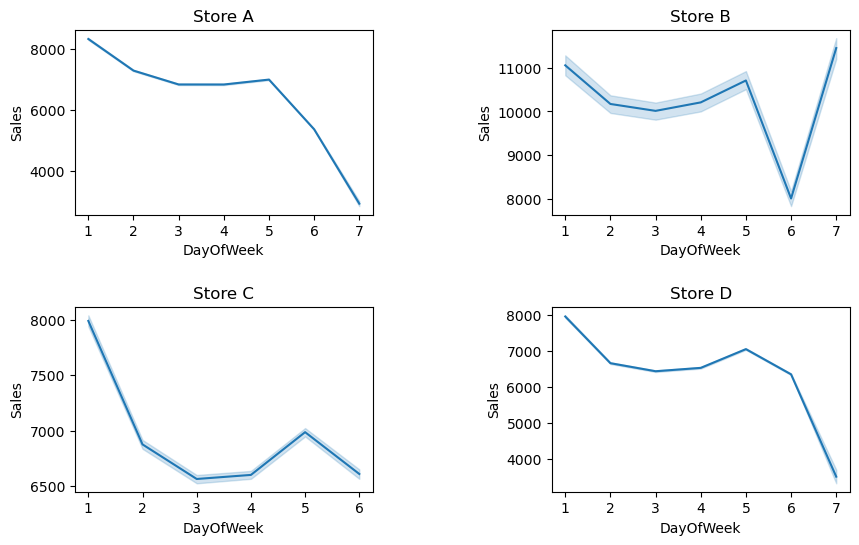

In [41]:
o1 = data[(data['StoreType']=='a') & (data["Open"] == 1)]
o2 = data[(data['StoreType']=='b') & (data["Open"] == 1)]
o3 = data[(data['StoreType']=='c') & (data["Open"] == 1)]
o4 = data[(data['StoreType']=='d') & (data["Open"] == 1)]


fig, axes = plt.subplots(2,2,figsize=(10,6))
fig.subplots_adjust(hspace=0.500,wspace=0.600)

sns.lineplot(data=o1,x='DayOfWeek',y='Sales',markers='o',ax=axes[0,0]).set_title('Store A')
sns.lineplot(data=o2,x='DayOfWeek',y='Sales',markers='o',ax=axes[0,1]).set_title('Store B')
sns.lineplot(data=o3,x='DayOfWeek',y='Sales',markers='o',ax=axes[1,0]).set_title('Store C')
sns.lineplot(data=o4,x='DayOfWeek',y='Sales',markers='o',ax=axes[1,1]).set_title('Store D')

plt.show()

### Observation
* StoreType 'A' and 'D' shows almost similar sales pattern when they are opened
* StoreType 'A' and 'D' might be mostly closed on day 7 (Sunday) (indicates the sharp downward curve on day 7)
* All the StoreType register their highest sale of week on first day of week (Monday), except the StoreType 'B' which registers its highest sale on day 7 (Sunday), followed by day 1 (Monday)
* StoreType 'C' registers low sales throughout the week except on first day (Monday) and fifth day (Friday)

## Sales of each assortment per DayOfWeek

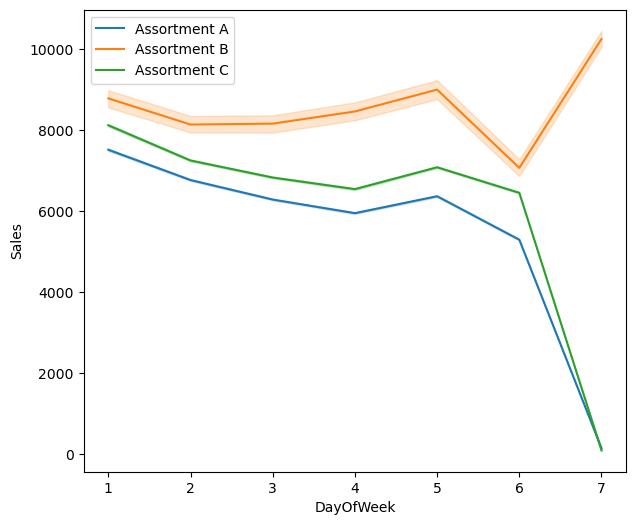

In [42]:
t1 = data[data.Assortment == 'a']
t2 = data[data.Assortment == 'b']
t3 = data[data.Assortment == 'c']

plt.subplots(figsize = (7, 6))
sns.lineplot(x = t1.DayOfWeek, y = t1.Sales, label="Assortment A")
sns.lineplot(x = t2.DayOfWeek, y = t2.Sales, label="Assortment B")
sns.lineplot(x = t3.DayOfWeek, y = t3.Sales, label="Assortment C")
plt.show()

### Observation
* Assortment type 'A' witnessed highest Sales on each day of week, compared to other assortment types
* Assortment type 'B' shows slightly higher sales than assortment type 'C' but they indicates almost similar sales pattern throughout the week
* Assortment type 'B' and 'C' are more likely to be closed on Sunday (Day 7)
* Assortment type 'A' registers its highest sales on Sunday

## CompetitionDistance and Sales

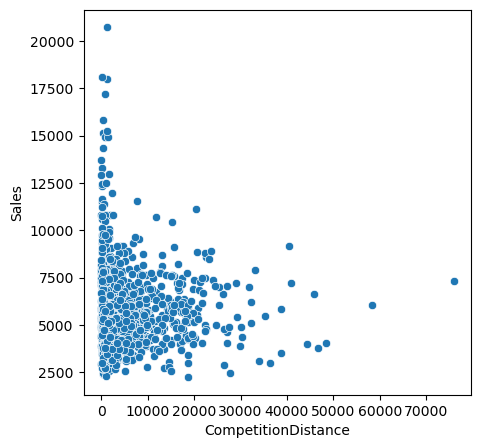

In [43]:
# Competition distance and Sales
a = data.groupby('Store').agg({
    'CompetitionDistance': 'mean',
    'Sales': 'mean'
})
plt.subplots(figsize = (5,5))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=a)
plt.show()

### Observation
* Majority of Sales are confined within a range of Competition distance of 0 to 15,000 meters (15 KM)
* Stores with the smallest competition distance have the highest sales. This indicates that the stores are located at city center or near hospitals. Even though having large distance between competitors is ideally considered great for sales, stores located at city centers will still get more sales regardless of competitors distance as there are more customers at city centers.


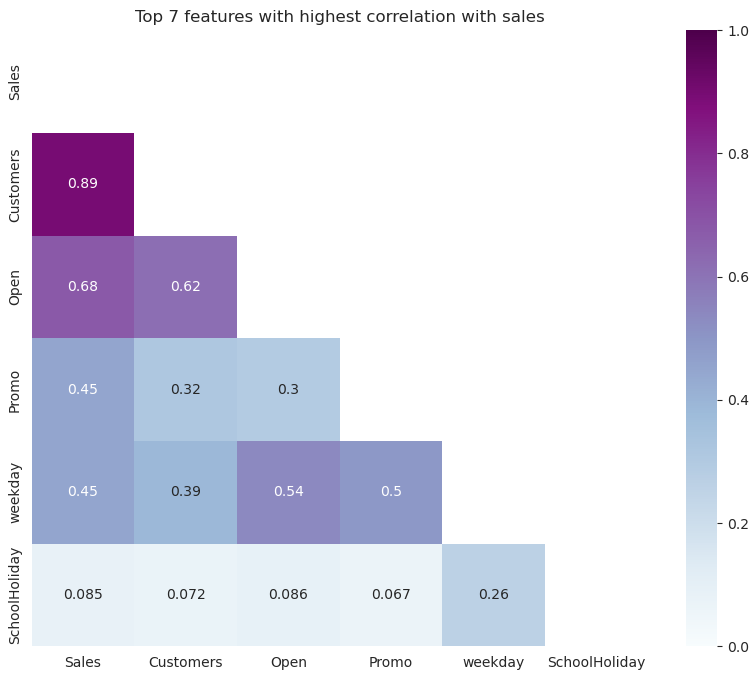

In [44]:
# Correlation Analysis
f_most_correlated = data.corr(numeric_only=True).nlargest(6,'Sales')['Sales'].index
f_correlation = data[f_most_correlated].corr()

# Generate a mask for the upper triangle
f_mask = np.zeros_like(f_correlation)
f_mask[np.triu_indices_from(f_mask)] = True
with sns.axes_style("white"):
    f_fig, f_ax = plt.subplots(figsize=(10, 8))
    f_ax = sns.heatmap(f_correlation, mask=f_mask, vmin=0, vmax=1, square=True,
                        annot=True, annot_kws={"size": 10}, cmap="BuPu")
plt.title('Top 7 features with highest correlation with sales')
plt.show()

## Sales before, after and during Christmas

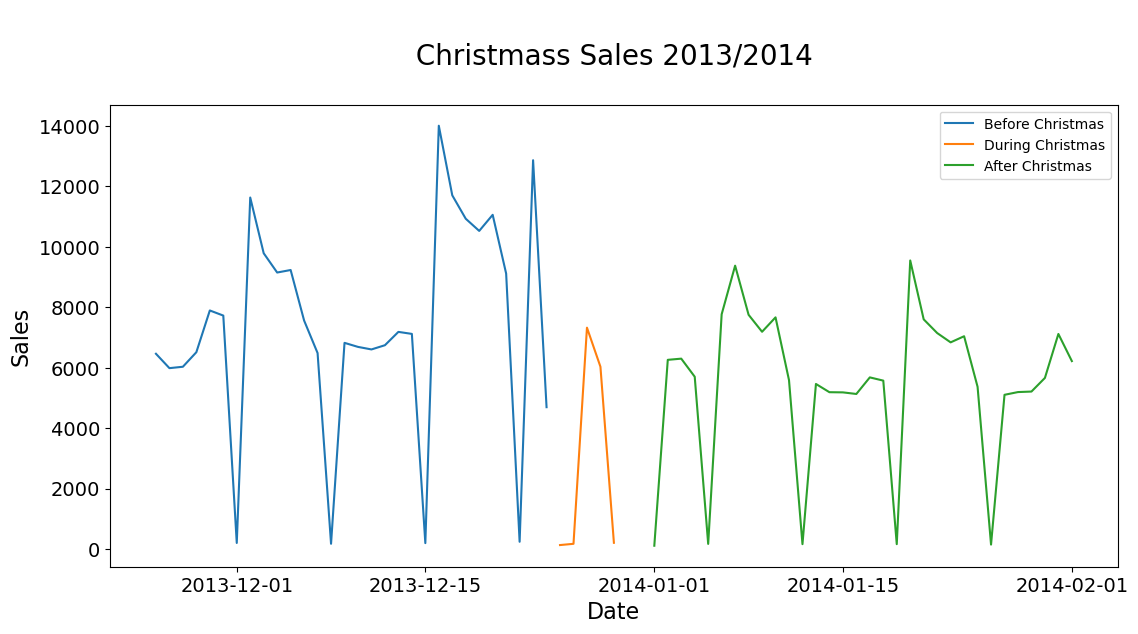

In [45]:
before_index = (data["Date"] >= pd.to_datetime("2013-11-25")) & (data["Date"] < pd.to_datetime("2013-12-25"))
before_xmass = data[before_index].groupby("Date").agg({"Sales": "mean"})

during_index = (data["Date"] >= pd.to_datetime("2013-12-25")) & (data["Date"] < pd.to_datetime("2013-12-30"))
during_xmass = data[during_index].groupby("Date").agg({"Sales": "mean"})

after_index = (data["Date"] >= pd.to_datetime("2014-01-01")) & (data["Date"] < pd.to_datetime("2014-02-02"))
after_xmass = data[after_index].groupby("Date").agg({"Sales": "mean"})


plt.figure(figsize=(13, 6))

sns.lineplot(x = before_xmass.index, y = before_xmass["Sales"], label='Before Christmas')
sns.lineplot(x = during_xmass.index, y = during_xmass["Sales"], label='During Christmas')
sns.lineplot(x = after_xmass.index, y = after_xmass["Sales"], label='After Christmas')

plt.title("\n Christmass Sales 2013/2014 \n", size=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Date", fontsize=16)
plt.ylabel(ylabel="Sales", fontsize=16)
plt.show()

### Observation
* Sales are increased during Chirstmas week, especially the week before. This might be due to the fact that people buy more medicines for precaution during Christmas celebration.

# Saving the cleaned training data for Machine learning model building purpose.

In [46]:
data.to_csv('data/data.csv')

## NOTE : Part 2 of the project (Model building) is performed in 'ML models.ipynb' file.